In [63]:
import os, glob, pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns, numpy as np

os.chdir("C://Users//Ruben//Downloads//metadata")

In [78]:
## Create Loop that Imports DFS

dfm = pd.DataFrame()

for p in range(50,81,10):
    wd = "C://Users//Ruben//Downloads//metadata//leco_set_" + str(p)
    os.chdir(wd)
    ldf = glob.glob('*.csv')
    fn = [f for f in ldf if "extracted" in f][0]
    df = pd.read_csv(fn)
    df['year'] = str(p)
    print("18" + str(p) + " | " + str(len(df)))
    dfm = dfm.append(df)

1850 | 2026
1860 | 2995
1870 | 6250
1880 | 7304


In [79]:
dfm  = dfm[(dfm.res != "no wage indication") & (dfm.res != "qualitative")]
dfm = dfm.reset_index(drop=True)

In [80]:
def PlotOccupationPeriod(occ, period):
    
    dft = dfm[dfm.year == str(period)]
    dft = dft.reset_index(drop=True)
    list_wages = list()
    
    for c,i in enumerate(dft.res):
        if occ in dft.occ[c]:

            try:
                i = int(i)
                list_wages.append([period, i])

            except ValueError:
                continue
                
    return list_wages

def PlotDiachronic(start_year, end_year, interval, occupation, upper_limit):
    ml = list()
    for i in range(start_year,end_year,interval):
        l = PlotOccupationPeriod(occupation, i)
        ml = ml + l
    dfr = pd.DataFrame([[k for k,v in ml], [v for k,v in ml]]).T
    dfr.columns = ['per', 'w']
    dfr['per'] = dfr.per.astype(str)
    dfr['per'] = ["18" + i for i in list(dfr['per'])]
    dfr = dfr[dfr.w < upper_limit]
    #dfr.boxplot(column='w', by = 'per')
    
    ax = sns.boxplot(x="per", y="w", data=dfr)

    # Calculate number of obs per group & median to position labels
    medians = dfr.groupby(['per'])['w'].median().values
    nobs = dfr['per'].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
        horizontalalignment='center', size='x-small', color='lightgrey', weight='semibold')
    
    ax.set(xlabel='Periods (Decades)', ylabel='Wage')
    ax = ax.get_figure()
    ax.savefig('dienstbode_200.png', dpi=400)

    return ax

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

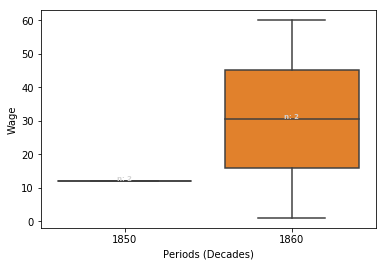

In [86]:
dfr = PlotDiachronic(50, 61, 10, "bode", 1000)

In [76]:
df

,res,occ,year
0,no wage indication,gemeenten,90
1,griffier,gedeputeerd»,90
2,griffier,voorzitter,90
3,griffier,griffier,90
4,griffier,gedeputeerd»,90
5,griffier,voorzitter,90
6,griffier,griffier,90
7,50,voorzitter,90
8,50,griffier,90
9,no wage indication,administratie,90


In [75]:
[i for i in list(df.res) if i == "qualitative"]

['qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualitative',
 'qualit